In [29]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

In [30]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'DESeq2'”
Old packages: 'backports', 'brio', 'cpp11', 'credentials', 'devtools',
  'digest', 'fs', 'glue', 'memoise', 'openssl', 'pkgbuild', 'pkgload', 'readr',
  'remotes', 'stringi', 'vroom', 'withr', 'xml2', 'nlme'



In [31]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
library("DESeq2")
library("pheatmap")

In [89]:
info   <- read.csv("ALL.info.csv", header=TRUE, row.names=c("r1", "r2", "r3", "c1", "c2", "c3"))

In [96]:
info = info[,-1]

In [97]:
head(info)

,id,condition
,<chr>,<chr>
1,SRR3414635,control
2,SRR3414636,control
3,SRR3414637,control
4,SRR3414629,reprogramming
5,SRR3414630,reprogramming
6,SRR3414631,reprogramming


In [76]:
system("git clone https://github.com/TheMostKnown/hse21_hw3")

In [86]:
counts <- as.matrix(read.csv("ALL.counts.csv", header=TRUE, row.names=c("geneID")))

In [94]:
counts = counts[,-1]

In [95]:
head(counts)

,c1,c2,c3,r1,r2,r3
ENSMUSG00000000001.4,3431,3504,4031,4489,3919,5700
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,150,136,152,345,273,468
ENSMUSG00000000031.16,55526,48225,56064,64504,33249,64992
ENSMUSG00000000037.17,41,44,52,77,68,87
ENSMUSG00000000049.11,10,8,10,4,1,1


In [98]:
dds <- DESeqDataSetFromMatrix(countData = counts, colData = info, design = ~ condition)


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [99]:
head(info)

,id,condition
,<chr>,<chr>
1,SRR3414635,control
2,SRR3414636,control
3,SRR3414637,control
4,SRR3414629,reprogramming
5,SRR3414630,reprogramming
6,SRR3414631,reprogramming


In [100]:
head(counts)

,c1,c2,c3,r1,r2,r3
ENSMUSG00000000001.4,3431,3504,4031,4489,3919,5700
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,150,136,152,345,273,468
ENSMUSG00000000031.16,55526,48225,56064,64504,33249,64992
ENSMUSG00000000037.17,41,44,52,77,68,87
ENSMUSG00000000049.11,10,8,10,4,1,1


In [101]:
# Tell the DDS which columns correspond to the 'reference' level of gene expression
dds$condition <- relevel(dds$condition, ref="control")

dds <- DESeq(dds)
res <- results(dds, alpha=0.01)   # Specify a more strict threshold on padj. This threshold is called 'alpha'


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



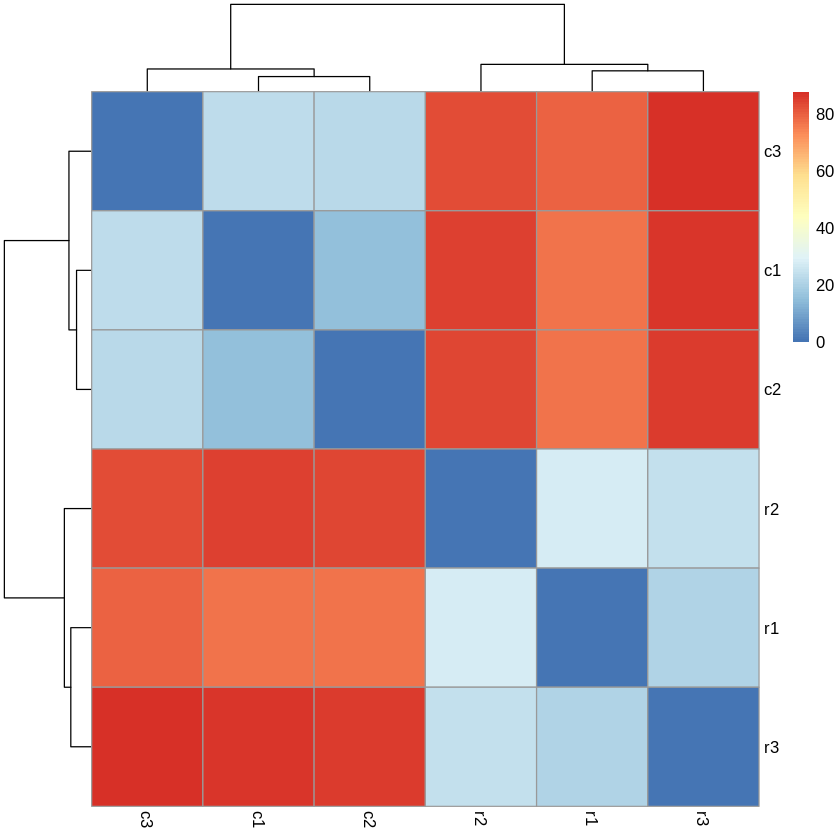

In [102]:
rld <- rlog(dds)
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
pheatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists)


In [103]:
resOrdered <- res[order(res$padj),]
resSignificant <- subset(resOrdered, padj < 0.01)
write.table(resSignificant, "differentially_expressed_genes.txt", sep="\t", row.names=TRUE, quote = FALSE)

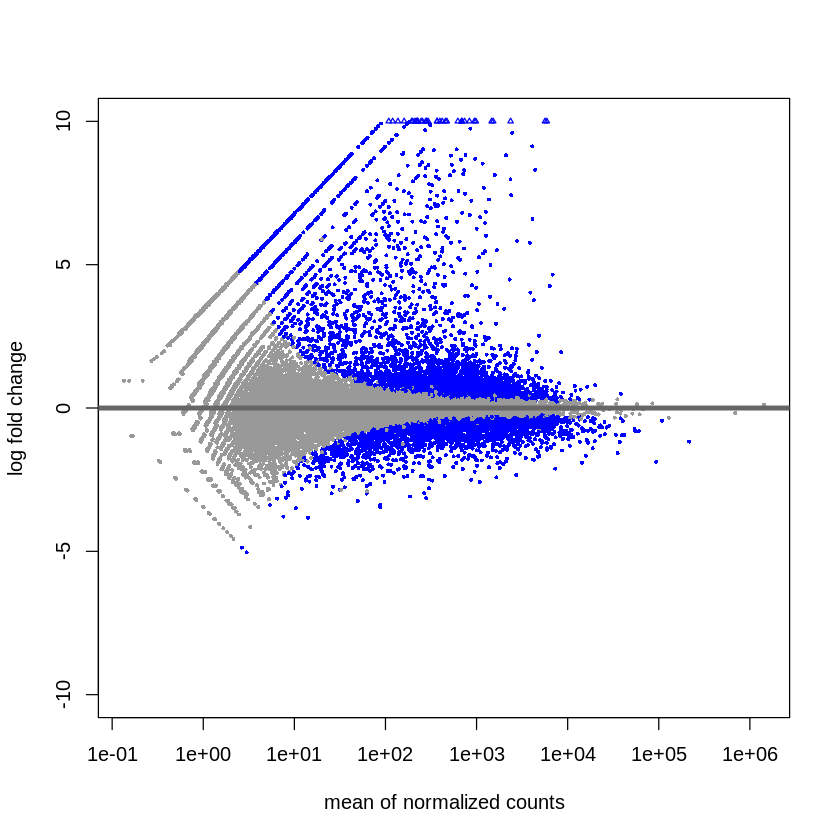

In [104]:
plotMA(res, ylim=c(-10,10))

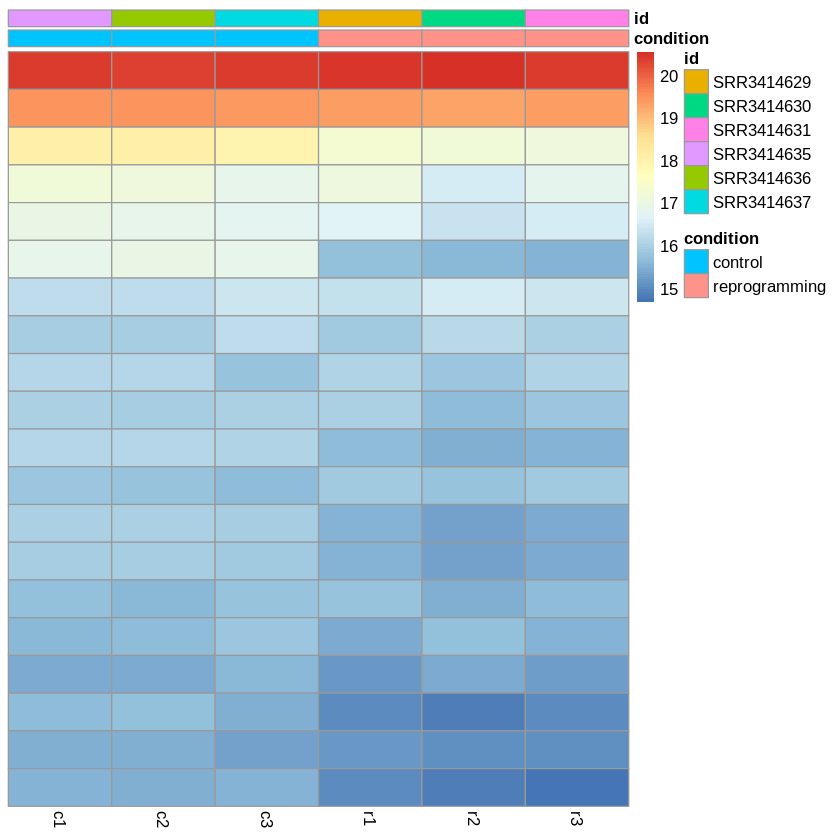

In [105]:
select <- order(rowMeans(counts(dds,normalized=TRUE)),decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("condition","id")])
pheatmap(assay(rld)[select,], cluster_rows=FALSE, show_rownames=FALSE,cluster_cols=FALSE, annotation_col=df)


log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 1 row and 6 columns
                      baseMean log2FoldChange     lfcSE      stat    pvalue
                     <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSMUSG00000000903.3   4.59517        2.57188   1.08959   2.36042 0.0182544
                          padj
                     <numeric>
ENSMUSG00000000903.3 0.0463177

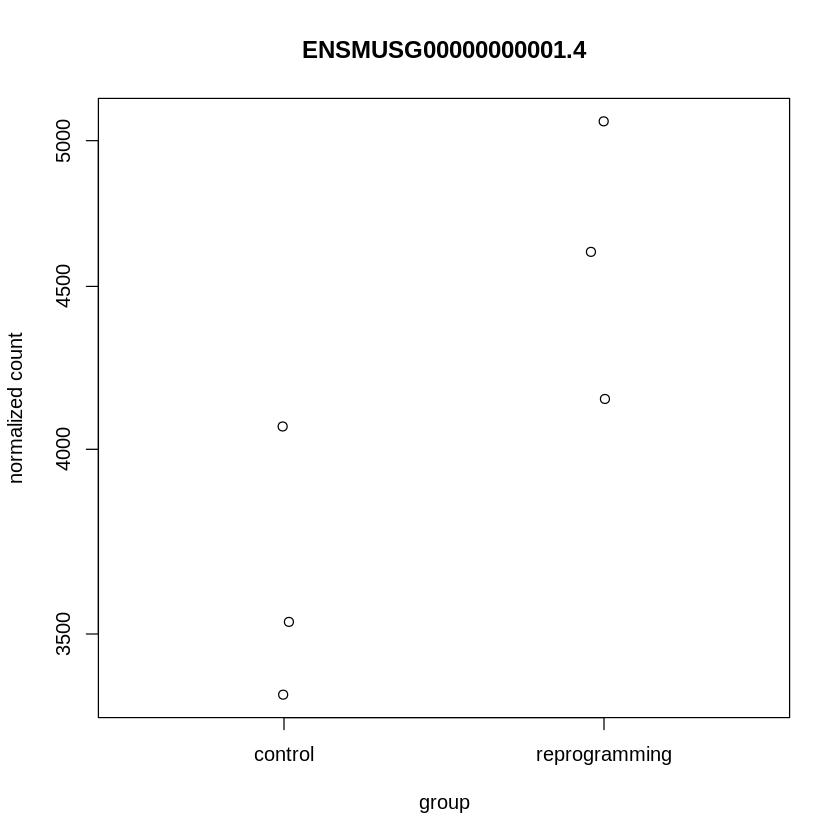

In [106]:
res[156,]
plotCounts(dds, gene=1, intgroup="condition")

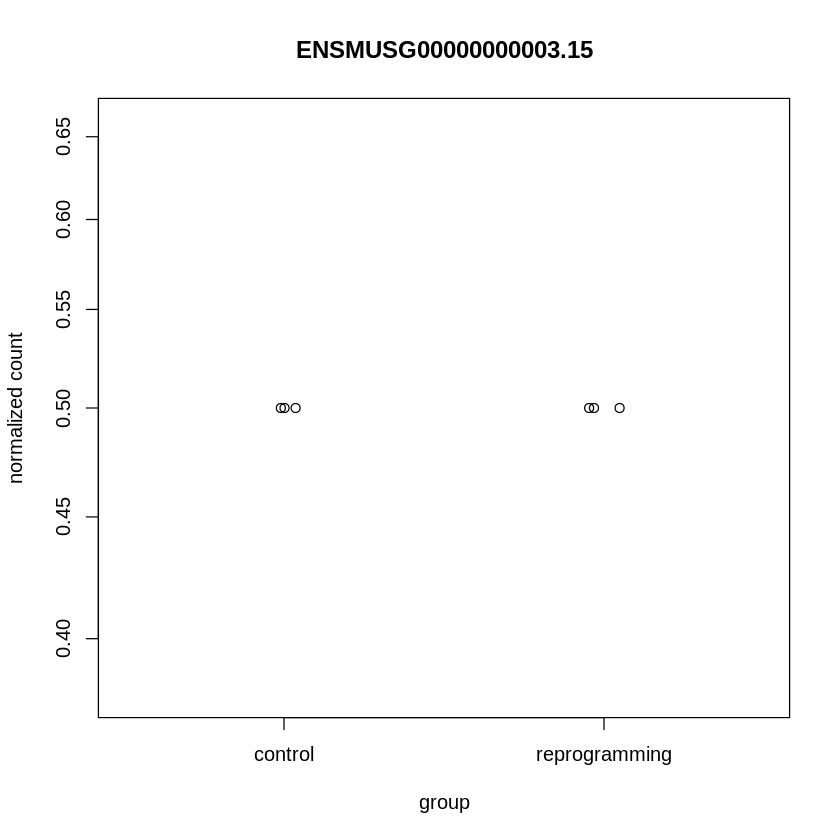

In [107]:
plotCounts(dds, gene=2, intgroup="condition")

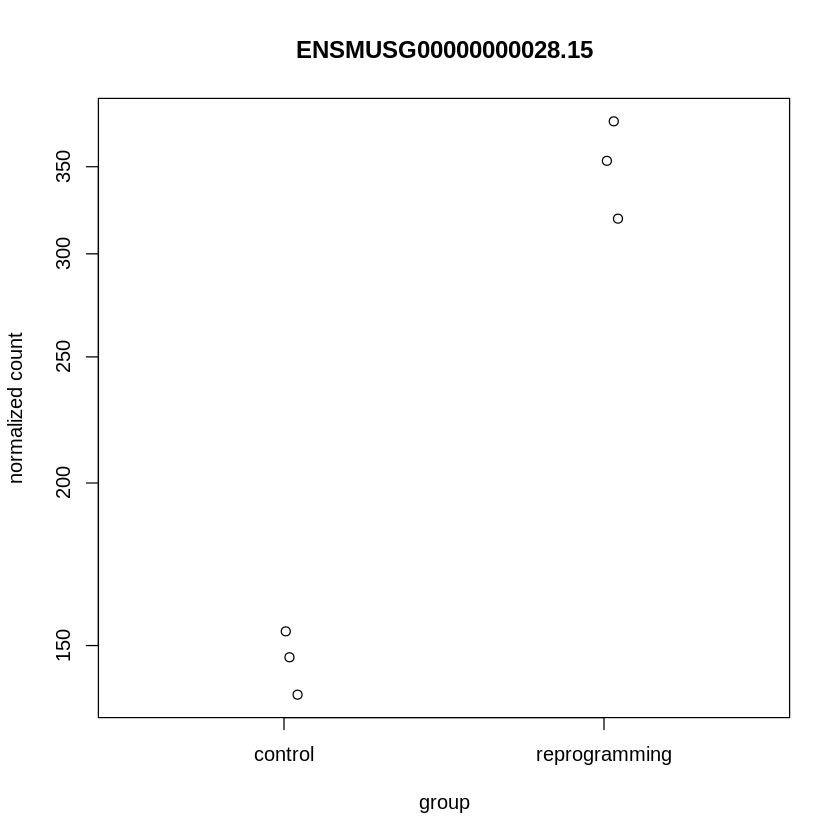

In [108]:
plotCounts(dds, gene=3, intgroup="condition")

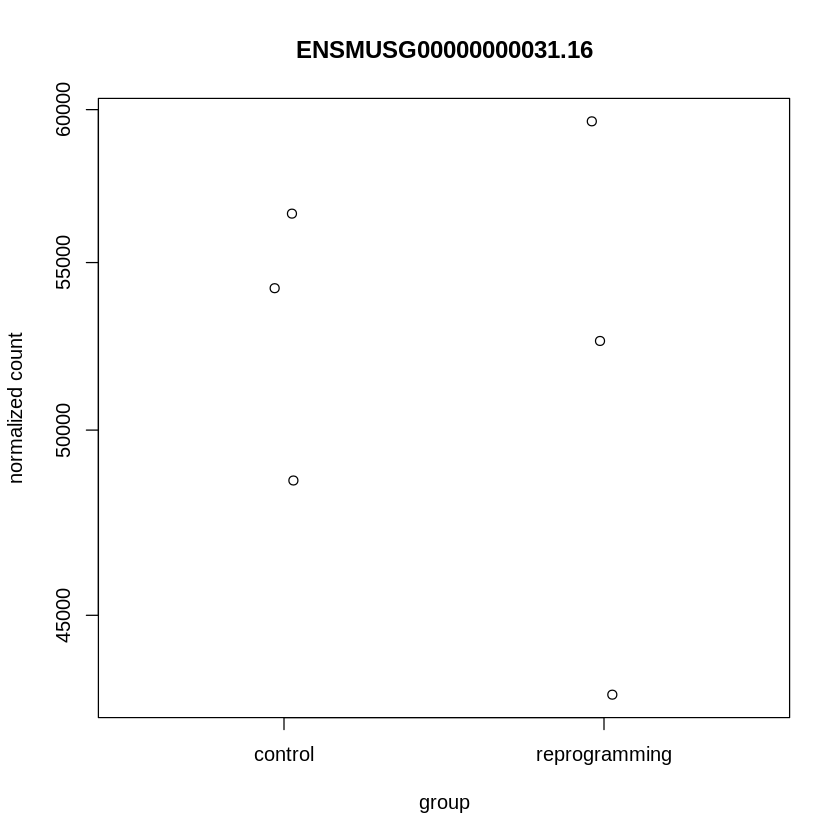

In [109]:
plotCounts(dds, gene=4, intgroup="condition")

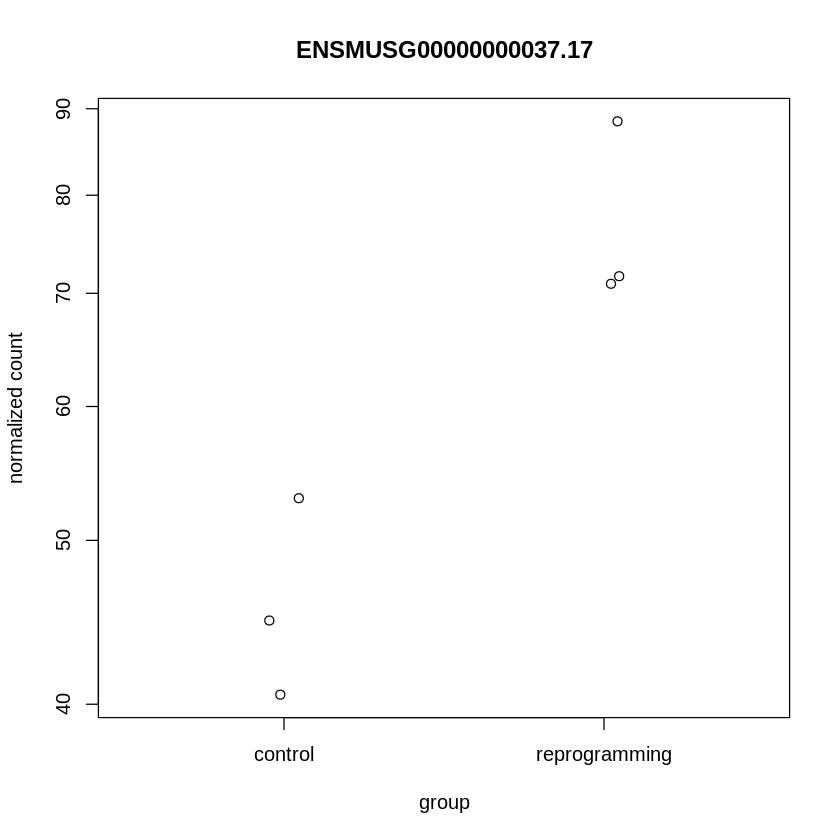

In [110]:
plotCounts(dds, gene=5, intgroup="condition")